<a href="https://colab.research.google.com/github/joi0804/pdm09/blob/main/project/cifar10_DL2_CNN_DataAug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN model of cifar10 dataset**
- Conv2D + FCN
    * Conv2D : 2차원 합성곱 필터링 + 풀링(Pooling)
    - > 2차원 필터로 영상을 대표하는 특징을 추출
    * FCN : 1차원 완전연결신경망
    - > Conv2D에서 추출된 대표 특징들을 이용하여 FCN으로 최종 학습 완료
    * ## **Data augmentation** : 데이터 증대

***
- ## Traget: **Find the best model** using Data augmentation
***

![cnn_c4f5.png](https://raw.githubusercontent.com/Redwoods/Py/master//pdm2020/my-note/py-tensorflow/images/cnn_c4f5.png)

## Search the best model of C4F5
- callback
    - Early stopping
    - model checkpoint
- Data augmentation

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


In [ ]:
# import TF2 submodules
from tensorflow.keras import layers, models, callbacks

## **데이터 로딩, 정규화**

In [ ]:
from keras.datasets import cifar10

(X_train0, y_train0), (X_test0, y_test0) = cifar10.load_data()

# Normalization
X_train, X_test = X_train0/255.0, X_test0/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

170498071/170498071 [==============================] - 4s 0us/step
X_train=(50000, 32, 32, 3)
y_train=(50000, 1)
X_test=(10000, 32, 32, 3)
y_test=(10000, 1)


In [ ]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train0, 10) #10개의 항목을 가진 1차원 벡터로 원 핫 인코딩을 한다. 
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((50000, 10), (10000, 10))

In [ ]:
# y_train0.shape vs. y_train.shape
y_train0.shape, y_train.shape #원핫 인코딩 10개의 클래스에 대해 각각의 클래스의 확률을 출력하기 위해 원핫 인코딩을 한다. 

((50000, 1), (50000, 10))

### Display cifar10 data
- one random image
- 10 representative images

14966


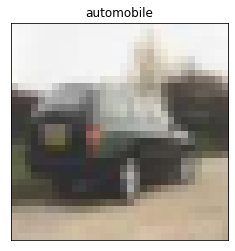

In [ ]:
# Code here!
# display one random image from the training set:
class_names =  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] #cifar 데이터 클래스 이름 

idx = np.random.randint(0, X_train0.shape[0]) #50000개 데이터 중 1개 랜덤 출력 
print(idx)
image = X_train0[idx]
plt.imshow(image) #, cmap=plt.get_cmap('gray'))
plt.title(class_names[y_train0[idx][0]])
plt.xticks([])
plt.yticks([])
plt.show()

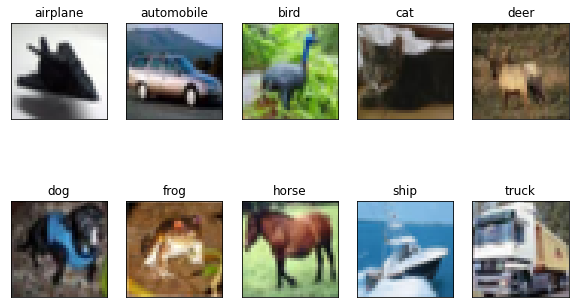

In [ ]:
fig = plt.figure(figsize=(10,6))
num0_9 = np.unique(y_train0, return_index=True)[1]
images = X_train[num0_9]
for i in range(10): #인덱스 0~10까지 이미지 출력
    plt.subplot(2, 5, i+1)
    # num0_9 = X_train0[y_train0 == i]
    
    # print(num0_9.shape)
    # plt.imshow(num0_9[0]) 
    plt.imshow(images[i])
    plt.title(class_names[i])
    plt.xticks([])
    plt.yticks([])

## data augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# data augmentation 이전의 cifar10 데이터 처리 방법 
# https://github.com/moritzhambach/Image-Augmentation-in-Keras-CIFAR-10-/blob/master/CNN%20with%20Image%20Augmentation%20(CIFAR10).ipynb
# set up image augmentation
datagen = ImageDataGenerator(
    rotation_range=10, #각도 10도 내외 조정
    horizontal_flip=True, #좌우반전 true 
    width_shift_range=0.1, #좌우로 10%이동
    height_shift_range=0.1 #상하 10%이동
    #zoom_range=0.3
    )
datagen.fit(X_train)

42211


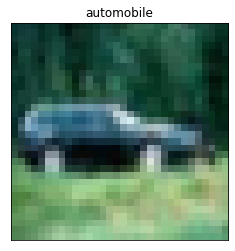

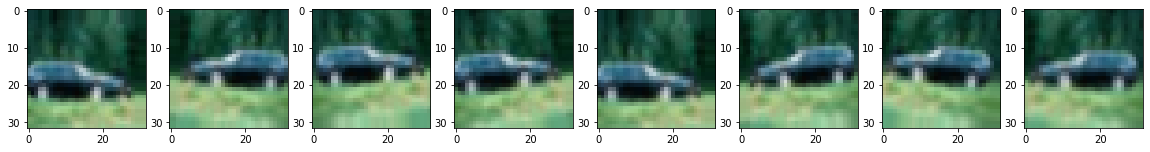

In [ ]:
# Show samples of data generation
# Select one sample 
idx = np.random.randint(0, X_train.shape[0]) #train 데이터 중 1개를 랜덤 추출 
print(idx)
sample = X_train[idx]
sample = np.expand_dims(sample, axis=0) #50000개중 1개의 사진 = sample 

image = X_train0[idx]
plt.imshow(image) #, cmap=plt.get_cmap('gray'))
plt.title(class_names[y_train0[idx][0]])
plt.xticks([])
plt.yticks([])
plt.show()

obj = datagen.flow(sample, batch_size=1) #선택한 사진을 sample로 넣어 변형된 사진 1개를 만든다. 
fig = plt.figure(figsize=(20,5))

for i in range(8):
	plt.subplot(1,8,i+1)
	image = obj.next() #next 함수를 통해 sample사진을 무작위로 변형된 사진 8개가 만들어진다.
	plt.imshow(image[0])
plt.show()

(50, 32, 32, 3) (50, 10)


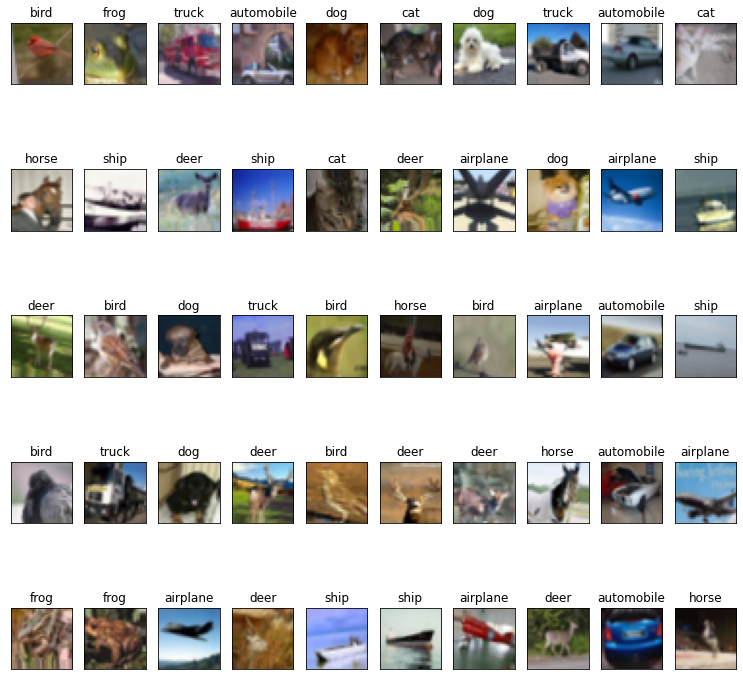

In [ ]:
BATCH_SIZE = 50 #datagen로 sample data가 들어가면 50개의 변형된 사진을 만든다. 
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=BATCH_SIZE): #train 입력 train 클래스를 넣어 50개의 미니배치 샘플을 만듬. 
    print(X_batch.shape, y_batch.shape) #미니배치의 크기 
    # create a grid of 5x10 images 
    plt.figure(figsize=(13,13)) 
    for i in range(BATCH_SIZE):
        plt.subplot(5,10,i+1)
        plt.imshow(X_batch[i]) #, cmap=plt.get_cmap('gray'))
        plt.title(class_names[np.argmax(y_batch[i])])
        plt.xticks([])
        plt.yticks([])
    # show the plot
    plt.show()
    break #break로 for문이 1번 돌고 끝남. 


# Design CNN

### import models, layers, callbacks
- models: Sequential
- layers: Conv2D, MaxPool2D, Flatten
- callbacks: ModelCheckpoint, EarlyStopping

In [ ]:
#위 만든 모델을 학습 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, TensorBoard
from keras import regularizers, optimizers

## **CNN4 + FCN5**

In [ ]:
c4f5 = keras.models.Sequential([ 
    Conv2D(input_shape=(32,32,3), filters= 64, kernel_size=(3,3),strides=(1,1), padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(filters= 128, kernel_size=(3,3), strides=(1,1), padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(filters= 256, kernel_size=(3,3), strides=(1,1), padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(filters= 512, kernel_size=(3,3), strides=(1,1), padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(256, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(512, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(1024, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c4f5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 28.5 MB/s 


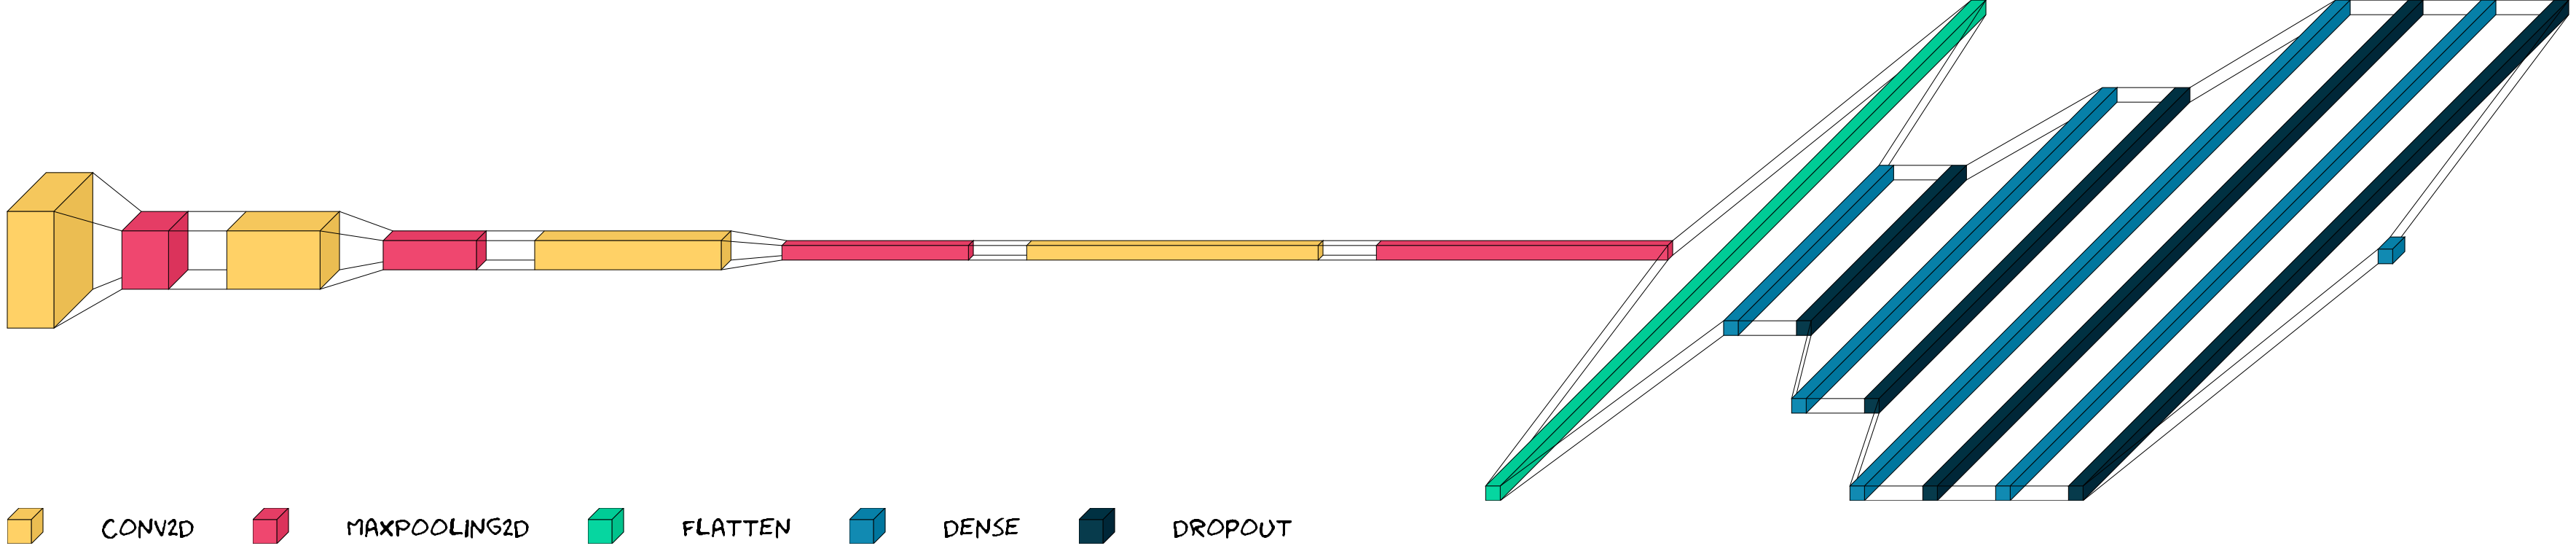

In [ ]:
# 모델 구조 시각화 - visualkareas.layered_view()
import visualkeras
from PIL import ImageFont
# font = ImageFont.truetype("arial.ttf", 24) # windows 10/11
font = ImageFont.truetype("Humor-Sans.ttf", 36)  # Linux
visualkeras.layered_view(c4f5, 
                         to_file='./c4f5_daug.png', 
                         legend=True, spacing=80, font=font, 
                         scale_xy=5, scale_z=1, one_dim_orientation='x')

In [ ]:
cp_callback = callbacks.ModelCheckpoint(filepath="./cifar10_c4f5_Daug_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', #5번 이후 정확도가 높은게 안나면 종료 
                            mode='max', verbose=1, patience=5)    # patience=10,20,50

In [ ]:
#  Training model using augmented data
epochs = 500
BATCH_SIZE = 50
hist = c4f5.fit(datagen.flow(X_train, y_train, batch_size=BATCH_SIZE), # BATCH_SIZE = 50
                 steps_per_epoch=X_train.shape[0]//BATCH_SIZE, 
                 epochs=epochs, verbose=1, 
                 callbacks=[cp_callback, es_callback], 
                 validation_data=(X_test,y_test))    

Epoch 1/500
1000/1000 [==============================] - 36s 35ms/step - loss: 1.8000 - accuracy: 0.3064 - val_loss: 1.3898 - val_accuracy: 0.4821
Epoch 2/500
1000/1000 [==============================] - 31s 31ms/step - loss: 1.3977 - accuracy: 0.4925 - val_loss: 1.1820 - val_accuracy: 0.5844
Epoch 3/500
1000/1000 [==============================] - 30s 30ms/step - loss: 1.2213 - accuracy: 0.5716 - val_loss: 1.0865 - val_accuracy: 0.6179
Epoch 4/500
1000/1000 [==============================] - 32s 32ms/step - loss: 1.1134 - accuracy: 0.6099 - val_loss: 0.9953 - val_accuracy: 0.6494
Epoch 5/500
1000/1000 [==============================] - 30s 30ms/step - loss: 1.0416 - accuracy: 0.6417 - val_loss: 0.9006 - val_accuracy: 0.6867
Epoch 6/500
1000/1000 [==============================] - 30s 30ms/step - loss: 0.9848 - accuracy: 0.6648 - val_loss: 0.9128 - val_accuracy: 0.6899
Epoch 7/500
1000/1000 [==============================] - 30s 30ms/step - loss: 0.9551 - accuracy: 0.6782 - val_loss: 0

In [ ]:
c4f5.evaluate(X_test, y_test, batch_size = BATCH_SIZE)

200/200 [==============================] - 1s 5ms/step - loss: 0.6463 - accuracy: 0.7839


[0.6463033556938171, 0.7839000225067139]

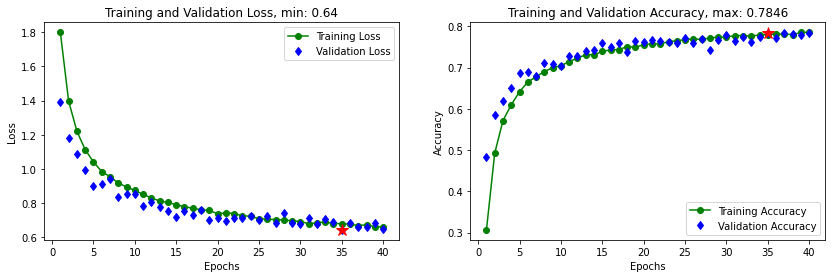

In [ ]:
# More graphs of loss and accuracy
history_dict = hist.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## More complex model
- CNN: 6 layers
- FCN: 2 layers

> 영상에서 특징을 찾는 CNN은 강화하고, 찾아낸 특징으로 학습하는 FCN은 단순하게 신경망을 구성.

In [ ]:
# 모델 구성
num_classes = 10
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=X_train.shape[1:])) 
model.add(Activation('elu'))
model.add(BatchNormalization()) #각각 미니배치 단위마다 정규화 
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(128, activation='elu'))
model.add(Dense(num_classes, activation='softmax'))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                      

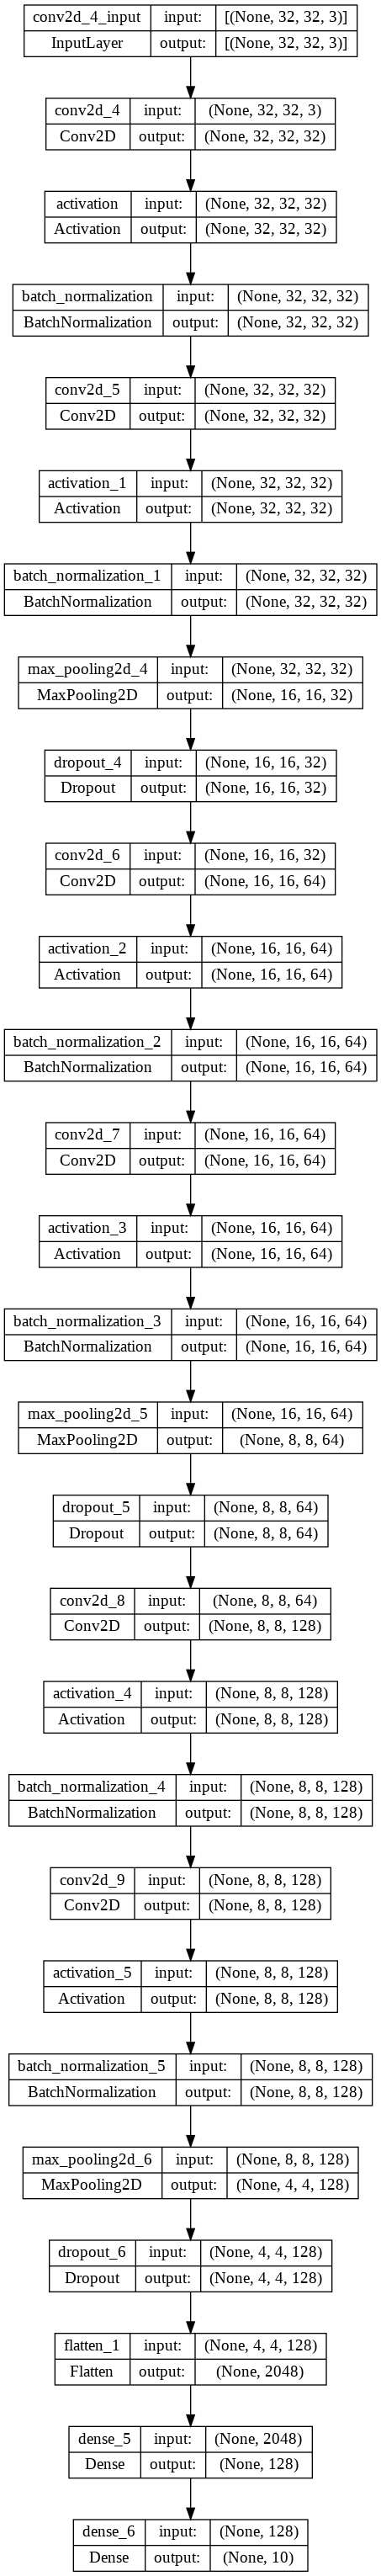

In [ ]:
# 모델 구조 요약 - summary(), plot_model()
model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# !pip install visualkeras

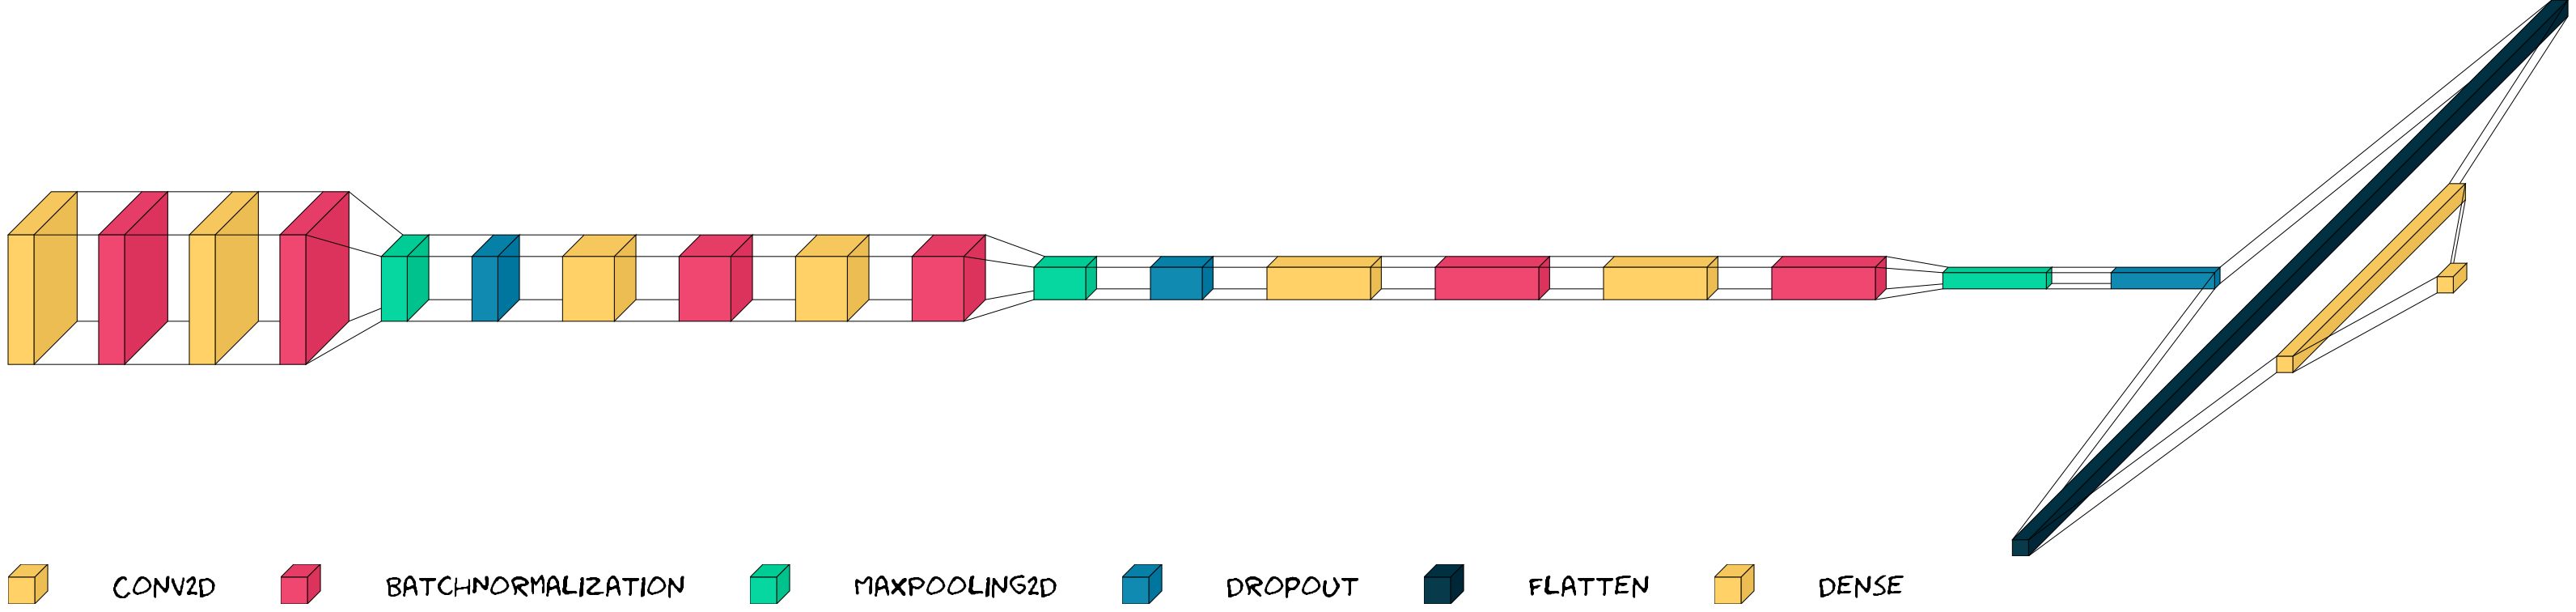

In [ ]:
# 모델 구조 시각화 - visualkareas.layered_view() #각각의 기능들을 분리시켜서 모델을 정의 해서 visualkeras에서 따로 표시 
import visualkeras
from PIL import ImageFont
# font = ImageFont.truetype("arial.ttf", 24) # windows 10/11
font = ImageFont.truetype("Humor-Sans.ttf", 36)  # Linux
visualkeras.layered_view(model, 
                         to_file='./c6f2_daug.png', 
                         legend=True, spacing=80, font=font, 
                         type_ignore=[Activation], #추가함 으로써 activation 을 무시 = 구조가 단순화
                         scale_xy=5, scale_z=1, one_dim_orientation='x')

In [ ]:
opt_rms = keras.optimizers.RMSprop(learning_rate=0.001,decay=1e-6)

In [ ]:
cp_callback = callbacks.ModelCheckpoint(filepath="./cifar10_Daug_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True) #검증 정확도가 최대가 될때마다 저장 
es_callback = callbacks.EarlyStopping(monitor='val_accuracy',  
                            mode='max', verbose=1, patience=5)  # 5, 10, 20, 50 #5번동안 다른 최대 정확도가 나타나지 않으면 종료 

In [ ]:
model.compile(loss='categorical_crossentropy',
        optimizer=opt_rms, # 'adam'
        metrics=['accuracy'])

In [ ]:
epochs = 500
BATCH_SIZE = 50
hist = model.fit(datagen.flow(X_train, y_train, batch_size=BATCH_SIZE),  #train 데이터 그대로가 아니라 증대(좌우,상하,회전) 데이터로 미니배치 묶음을 50단위로 하여 넣는다. == epoch = 1000 (50000/50)
                 steps_per_epoch=X_train.shape[0]//BATCH_SIZE, #사진의 변형된 이미지를 찾기 때문에 train 과 test 사이에 overfitting이 줄어든다. 
                 epochs=epochs, verbose=1, 
                 callbacks=[cp_callback, es_callback], 
                 validation_data=(X_test,y_test)) #원래 데이터 

Epoch 1/500
1000/1000 [==============================] - 37s 34ms/step - loss: 1.5971 - accuracy: 0.4540 - val_loss: 1.3100 - val_accuracy: 0.5780
Epoch 2/500
1000/1000 [==============================] - 47s 47ms/step - loss: 1.1803 - accuracy: 0.6095 - val_loss: 1.0788 - val_accuracy: 0.6542
Epoch 3/500
1000/1000 [==============================] - 33s 33ms/step - loss: 1.0375 - accuracy: 0.6673 - val_loss: 0.8956 - val_accuracy: 0.7269
Epoch 4/500
1000/1000 [==============================] - 37s 37ms/step - loss: 0.9606 - accuracy: 0.6998 - val_loss: 0.9933 - val_accuracy: 0.7207
Epoch 5/500
1000/1000 [==============================] - 44s 44ms/step - loss: 0.9007 - accuracy: 0.7210 - val_loss: 1.1904 - val_accuracy: 0.6472
Epoch 6/500
1000/1000 [==============================] - 31s 31ms/step - loss: 0.8547 - accuracy: 0.7418 - val_loss: 0.8770 - val_accuracy: 0.7445
Epoch 7/500
1000/1000 [==============================] - 33s 33ms/step - loss: 0.8191 - accuracy: 0.7566 - val_loss: 0

In [ ]:
model.evaluate(X_test, y_test, batch_size = BATCH_SIZE) #맨 마지막 epoch 훈련 정확도 일 뿐 최고의 모델은 아니다. # 검증 정확도가 82.32가 최고 모델 

200/200 [==============================] - 1s 5ms/step - loss: 0.6938 - accuracy: 0.8204


[0.6937835812568665, 0.8203999996185303]

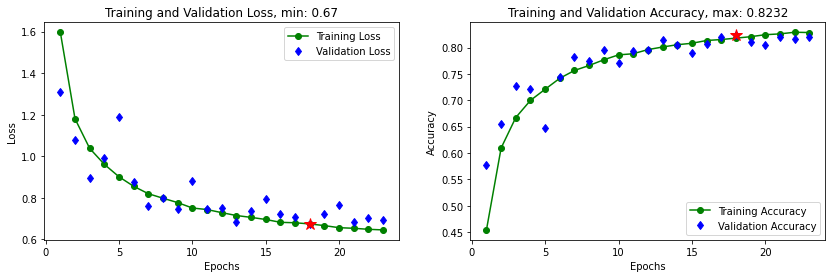

In [ ]:
# More graphs of loss and accuracy
history_dict = hist.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

---

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

### Best Daug model
- cifar10_Daug_best_weights.011-0.8137.hdf5
- cifar10_Daug_best_weights.028-0.8485.hdf5
- cifar10_c4f5_Daug_best_weights.026-0.7891.hdf5
- cifar10_c4f5_Daug_best_weights.035-0.7846.hdf5
- cifar10_Daug_best_weights.018-0.8232.hdf5
### Best c4f5 model of cifar10
- cifar10_c4f5_best_weights.010-0.7446.hdf5
- cifar10_c4f5_best_weights.012-0.7493.hdf5

In [ ]:
from keras.models import load_model

model_best = load_model('cifar10_Daug_best_weights.018-0.8232.hdf5')
model_best.evaluate(X_test, y_test, batch_size=BATCH_SIZE)

200/200 [==============================] - 1s 4ms/step - loss: 0.6737 - accuracy: 0.8232


[0.6736818552017212, 0.823199987411499]

---

In [ ]:
from sklearn.metrics import confusion_matrix

predictions = model_best.predict(X_test)
predictions0 = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test0, predictions0) #true 클래스, 예측한 클래스를 넣어 혼동행렬을 구한다.


313/313 [==============================] - 2s 5ms/step


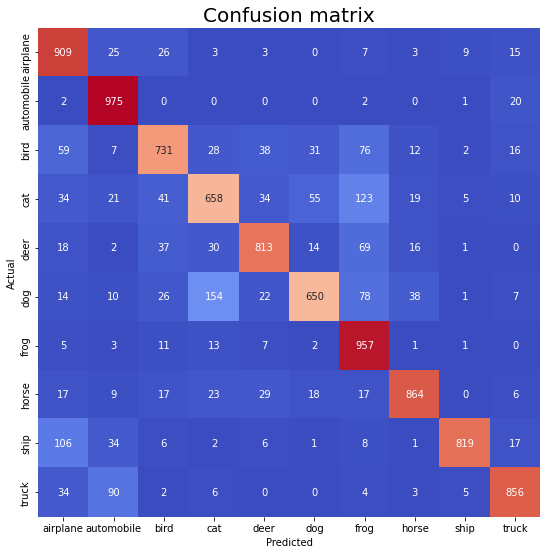

In [ ]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=class_names, yticklabels=class_names, fmt='d', annot=True, cmap=plt.cm.coolwarm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix', fontsize=20)
plt.show() #빨간색일수록 정확한것. 강아지,개 각각 클래스가 1000개인데 정확히 맞춘게 65% 고양이 65.8%로 정확하게 분류하지 못한다. 

## cats and dogs : Not good!

---

# [DIY] Test the best model